In [342]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LinearRegression

In [343]:
df = pd.read_csv('updated_cleaned_data.csv')

In [344]:
df_houses = df[df['Type of Property'] == 'house']
df_apartments = df[df['Type of Property'] == 'apartment']
df_num_subset = df[['Price (€)', 'Price per m²', 'Construction year', 'Bedrooms',
       'Living area (m²)', 'Furnished', 'How many fireplaces?',
       'Terrace', 'Terrace surface (m²)', 'Garden', 'Garden surface (m²)',
       'Surface of the plot (m²)', 'Number of frontages', 'Swimming pool',
       'Elevator', 'Basement', 
       'Primary energy consumption (kWh/m²)', 'CO₂ emission (kg CO₂/m²)',
       'Kitchen type scale',
       'Building condition scale']]
df_houses_num_subset = df_houses[['Price (€)', 'Price per m²', 'Construction year', 'Bedrooms',
       'Living area (m²)', 'Furnished', 'How many fireplaces?',
       'Terrace', 'Terrace surface (m²)', 'Garden', 'Garden surface (m²)',
       'Surface of the plot (m²)', 'Number of frontages', 'Swimming pool',
       'Elevator', 'Basement', 
       'Primary energy consumption (kWh/m²)', 'CO₂ emission (kg CO₂/m²)',
       'Kitchen type scale',
       'Building condition scale']]
df_apartments_num_subset = df_apartments[['Price (€)', 'Price per m²', 'Construction year', 'Bedrooms',
       'Living area (m²)', 'Furnished', 'How many fireplaces?',
       'Terrace', 'Terrace surface (m²)', 'Garden', 'Garden surface (m²)',
       'Number of frontages', 'Swimming pool',
       'Elevator', 'Basement', 
       'Primary energy consumption (kWh/m²)', 'CO₂ emission (kg CO₂/m²)',
       'Kitchen type scale',
       'Building condition scale']]

In [345]:
# df.loc[df['Bedrooms'] == 30.0,['Property ID', 'Region', 'City', 'Price (€)', 'Living area (m²)']]

In [346]:
df.isnull().sum()

Property ID                                0
Zip code                                   0
City                                       0
Type of Property                           0
Subtype of Property                        0
Price (€)                                  0
Construction year                       5277
Bedrooms                                   0
Living area (m²)                           0
Kitchen type                            4631
Furnished                                  0
How many fireplaces?                       0
Terrace                                    0
Terrace surface (m²)                       0
Garden                                     0
Garden surface (m²)                        0
Surface of the plot (m²)                5868
Number of frontages                     3320
Swimming pool                              0
Building condition                      3609
Elevator                                   0
Basement                                   0
Primary en

Text(0.5, 1.0, 'Correlation Between Variables')

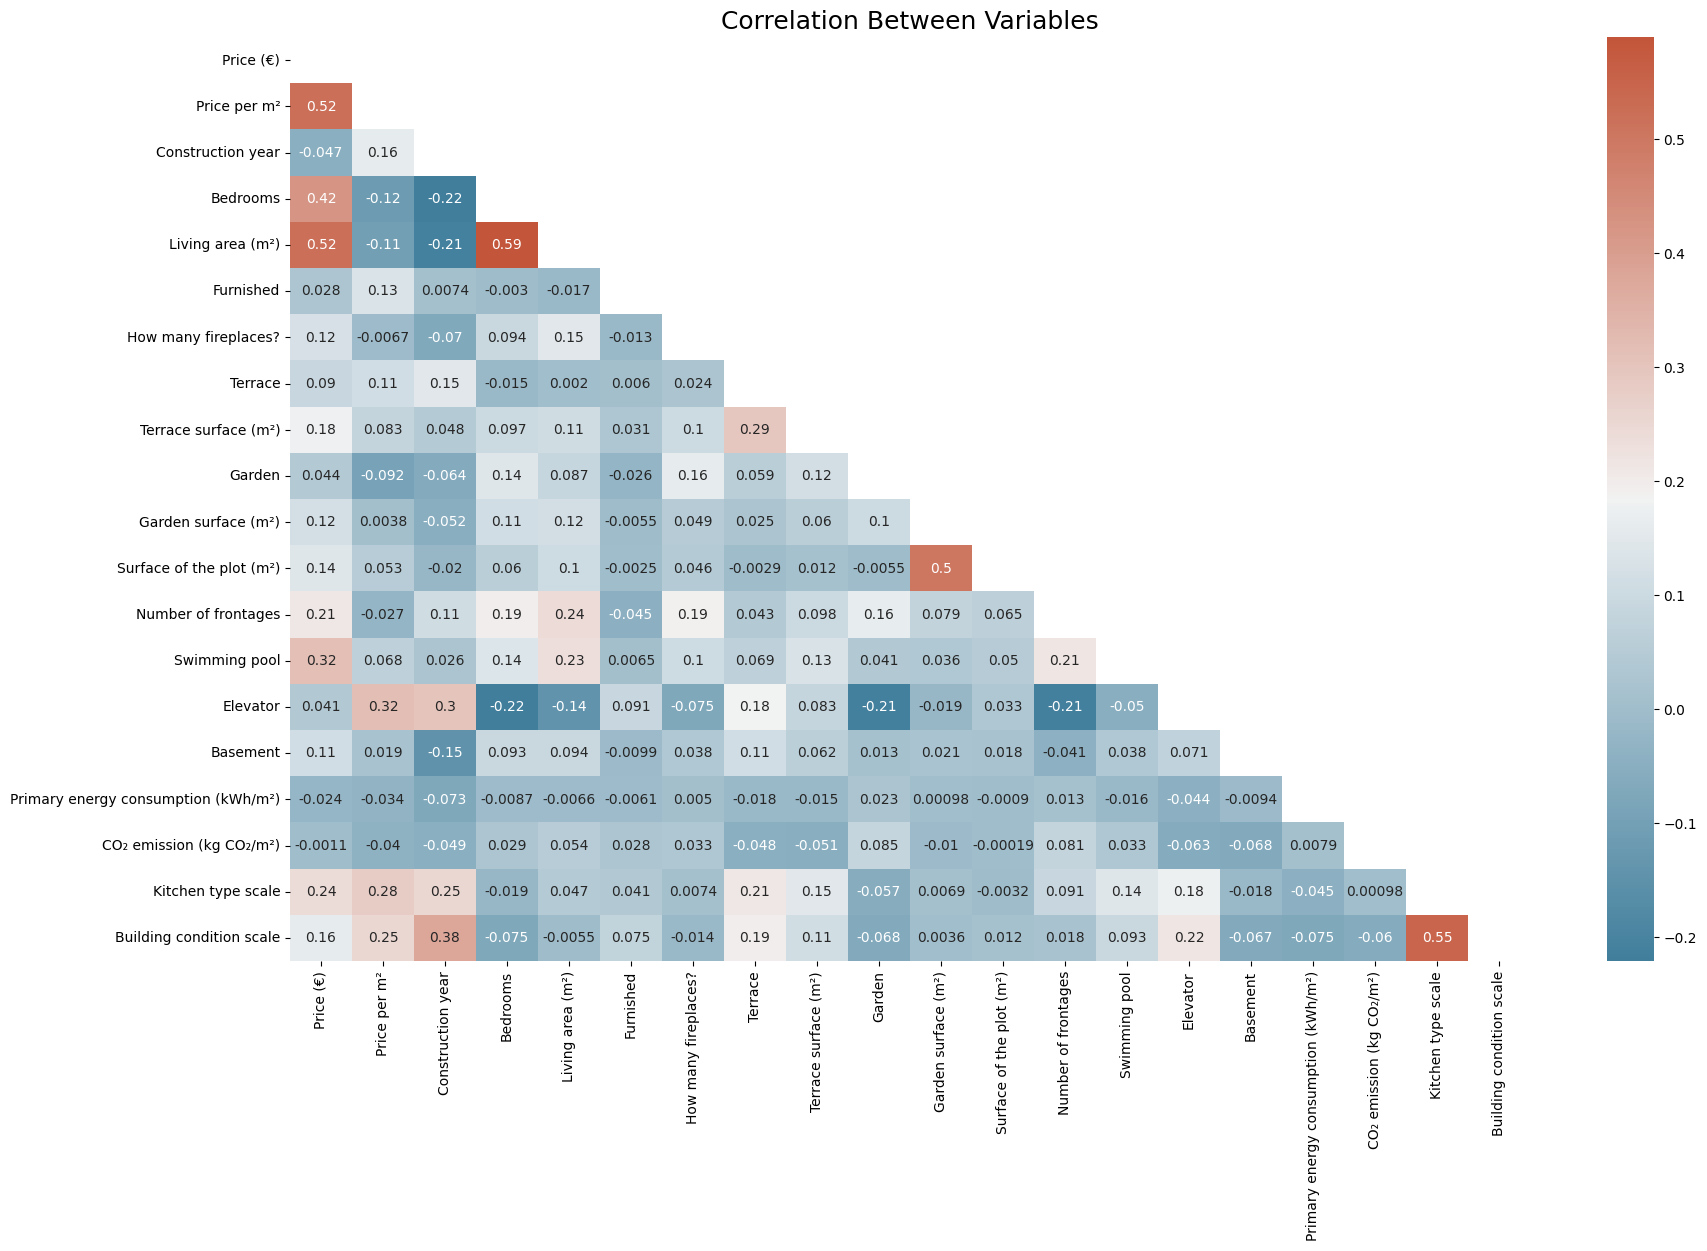

In [347]:
corr = df_num_subset.corr()
f, ax = plt.subplots(figsize=(20, 12))
# sns.set(font_scale=1)
# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)
plt.title("Correlation Between Variables", fontsize=18)

In [348]:
X_liv_area = df['Living area (m²)'].values

X = df[['Living area (m²)', 'Swimming pool', 'Bedrooms',
'Terrace surface (m²)', 'Garden surface (m²)']].values


y = df['Price (€)'].values

In [349]:
X_liv_area = X_liv_area.reshape(-1, 1)

Text(0, 0.5, 'Price (€)')

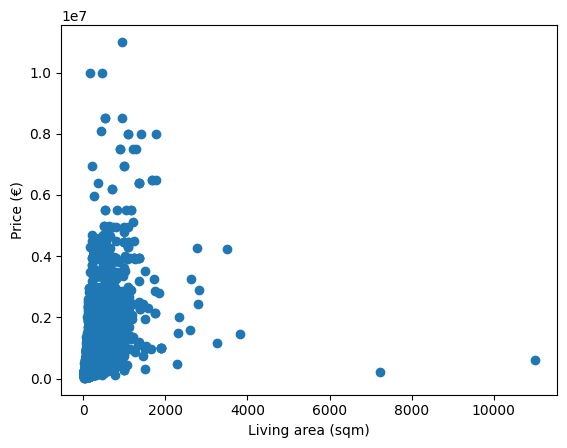

In [350]:
plt.scatter(X_liv_area, y)
plt.xlabel('Living area (sqm)')
plt.ylabel('Price (€)')

In [351]:
reg = LinearRegression()

In [352]:
reg.fit(X_liv_area, y)

LinearRegression()

In [353]:
predictions = reg.predict(X_liv_area)

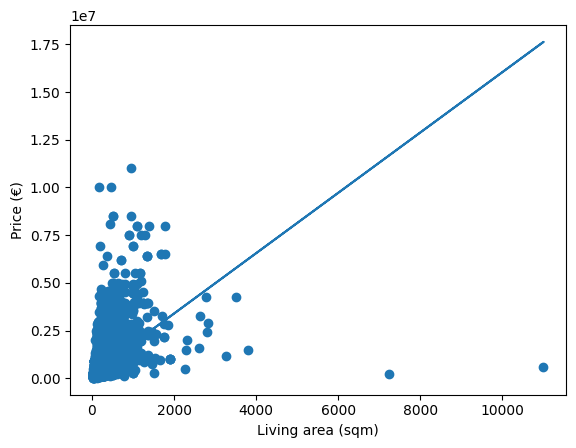

In [354]:
plt.scatter(X_liv_area, y)
plt.plot(X_liv_area, predictions)
plt.xlabel('Living area (sqm)')
plt.ylabel('Price (€)')
plt.show()

In [355]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [356]:
X_train

array([[131.,   0.,   2.,  39.,   0.],
       [195.,   0.,   3.,   0.,   0.],
       [135.,   0.,   4., 100.,   0.],
       ...,
       [160.,   0.,   3.,  23., 100.],
       [258.,   0.,   4., 100., 224.],
       [175.,   0.,   3.,  35.,   0.]])

In [357]:
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

In [358]:
reg_all.score(X_test, y_test)

0.3768894183721214

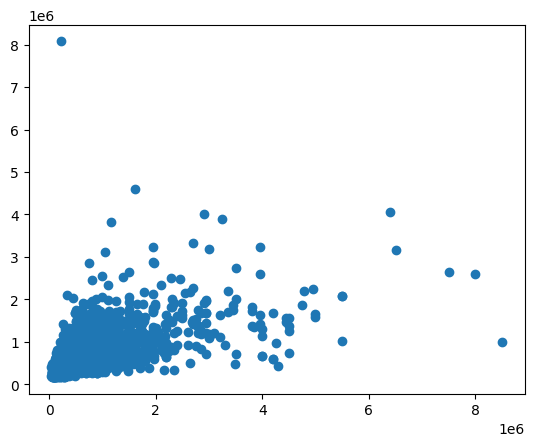

In [359]:
plt.scatter(y_test, y_pred)